In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

# Datasets are already shuffled by sklearn
# Thanks to that otherwise all training data would be of the same classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# stratification makes sure that both train and test sets have the same proportion of classes, e.g.:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [3]:
# Feature scale to make sure the data can be trained within the acceptable range of the model
sc = StandardScaler()
sc.fit(X_train)  # Estimates mean and std for each feature
X_train_std = sc.transform(X_train)  # Standardizes the features in training set
X_test_std = sc.transform(X_test)  # Uses same standardization for test set, to make sure they are comparable

# Decision Trees

Starts at the root and splits the data features in categories given the highest information gain. 
The process is repeated recursively until the leaf nodes are pure or a stopping criterion is met.
This process can lead do deep trees that are prone to overfitting, so the tree deep works as regularization method.

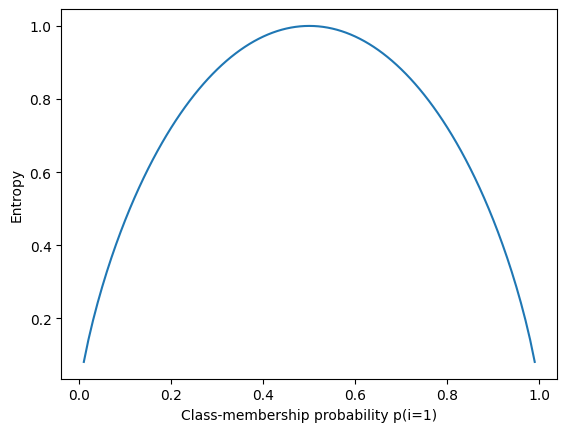

In [5]:
# Example of one of the metrics used to calculate information gain (or impurity) when splitting dataset, this is the entropy measure.
# This example is for a binary classifier, either 0 or 1.
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()
# Notice the probability of the classes is more evenly distributed amongst the nodes, the higher the entropy.

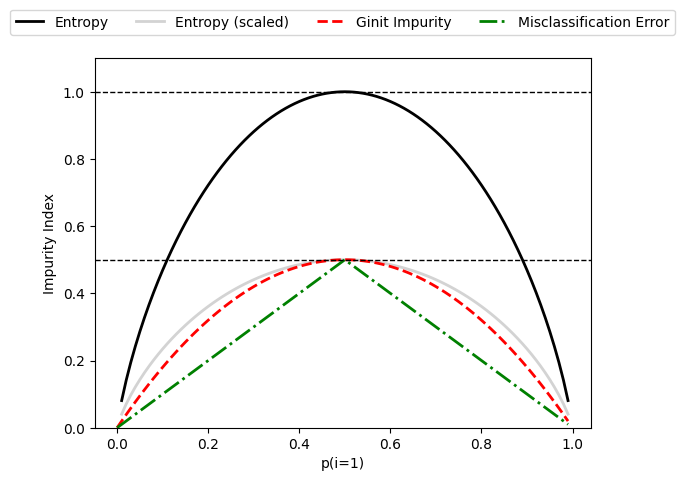

In [6]:
# Example of impurity measures (used to calculation information gain by splitting the dataset at each node-level) for three different metrics.
def gini(p):
    return p*(1 - p) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Ginit Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

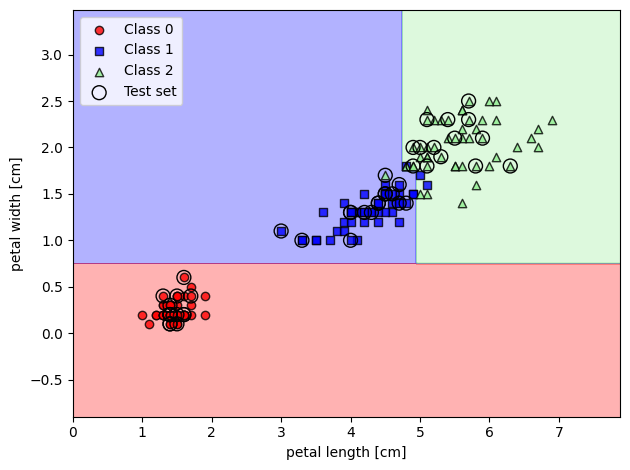

In [11]:
# Building a decision tree
# Decision trees can build complex decision boundaries by dividing the feature space into rectangles.
# Feature scaling is not a requirement for decision tree algorithms
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
utils.plot_decision_regions(X=X_combined, y=y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

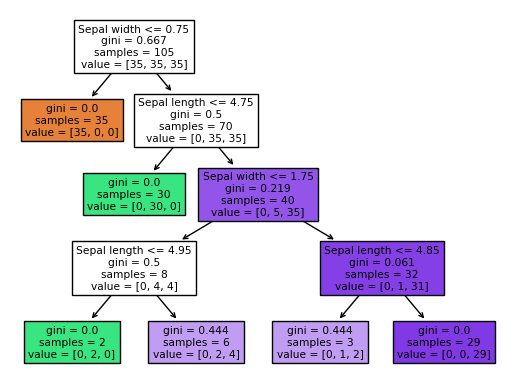

In [13]:
# Visualizing the tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

# Random Forests

Ensemble various decision trees which suffer from high variance (overfitting), by averaging them, with the goal to improve performance.

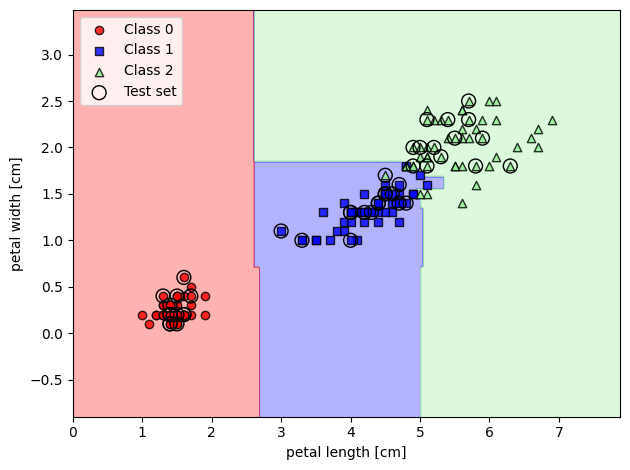

In [18]:
# Number of estimators is the number of decision trees ensemble in the forest
# By default the gini metric is used to measure the quality of the split
# Number of jobs is the number of cores used to parallelize the training
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

utils.plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()